<h2>Convergence Tests</h2>
In this notebook, we check the convergence of previous studies with respect to KK and LL. 

In [1]:
import math
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt

import numpy as np

# Libra dependancies
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_read
import libra_py.dynamics.heom.compute as compute

# For plotting
colors = {}

colors.update({"11": "#8b1a0e"})  # red
colors.update({"12": "#FF4500"})  # orangered
colors.update({"13": "#B22222"})  # firebrick
colors.update({"14": "#DC143C"})  # crimson

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<flo

First checking convergence for $\Delta$E = 100 cm$^{-1}$

In [2]:
Ham = CMATRIX(2,2)
Ham.set(0, 0, 50.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -50.0 * units.inv_cm2Ha);

rho = CMATRIX(2,2)
rho.set(0, 0, 1.0+0.0j)


params = { "KK":0, "LL":10,
           "gamma": 1/(0.1 * units.ps2au),
           "eta": 2.0 * 50.0 * units.inv_cm2Ha,
           "temperature": 300.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),

           "dt":0.1*units.fs2au, "nsteps":10000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":16,

           "prefix":"convergence/out_default_a_0",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

Run dynamics varying only convergence parameters (KK and LL). 

In [3]:
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 6.860710859298706 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 41.0458288192749 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations too

Plot results

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


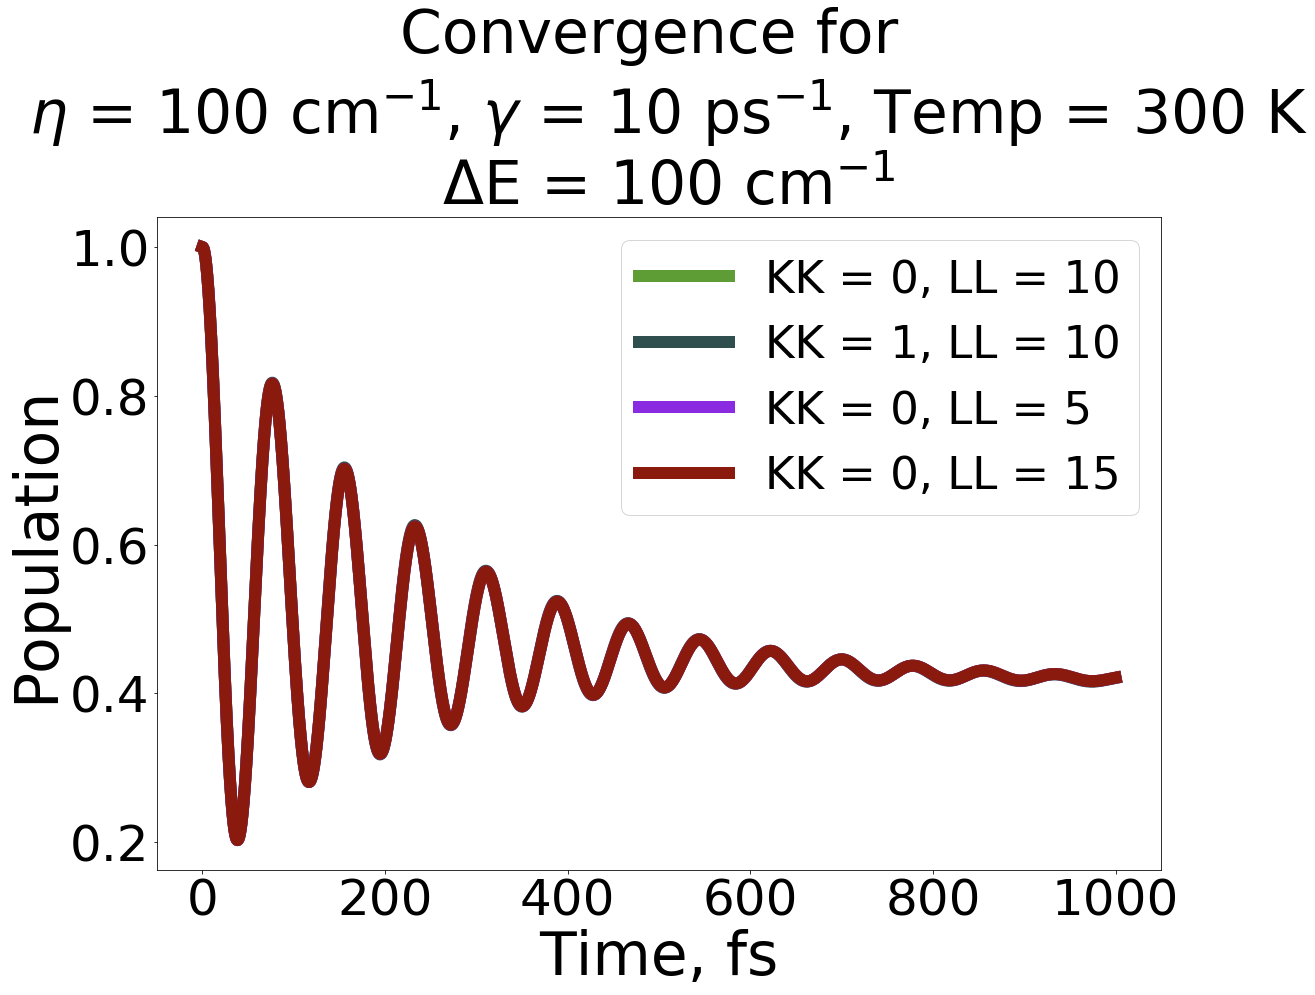

In [4]:
A = [ None, None ]

with h5py.File(F"convergence/out_default_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_default_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_default_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_default_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

Repeat for different $\eta, \gamma$, and temperature.

In [5]:
params.update({"prefix":"convergence/out_gamma5_a_0", "KK":0, "LL":10, "gamma":5/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 7.7103869915008545 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 41.22934818267822 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations t

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


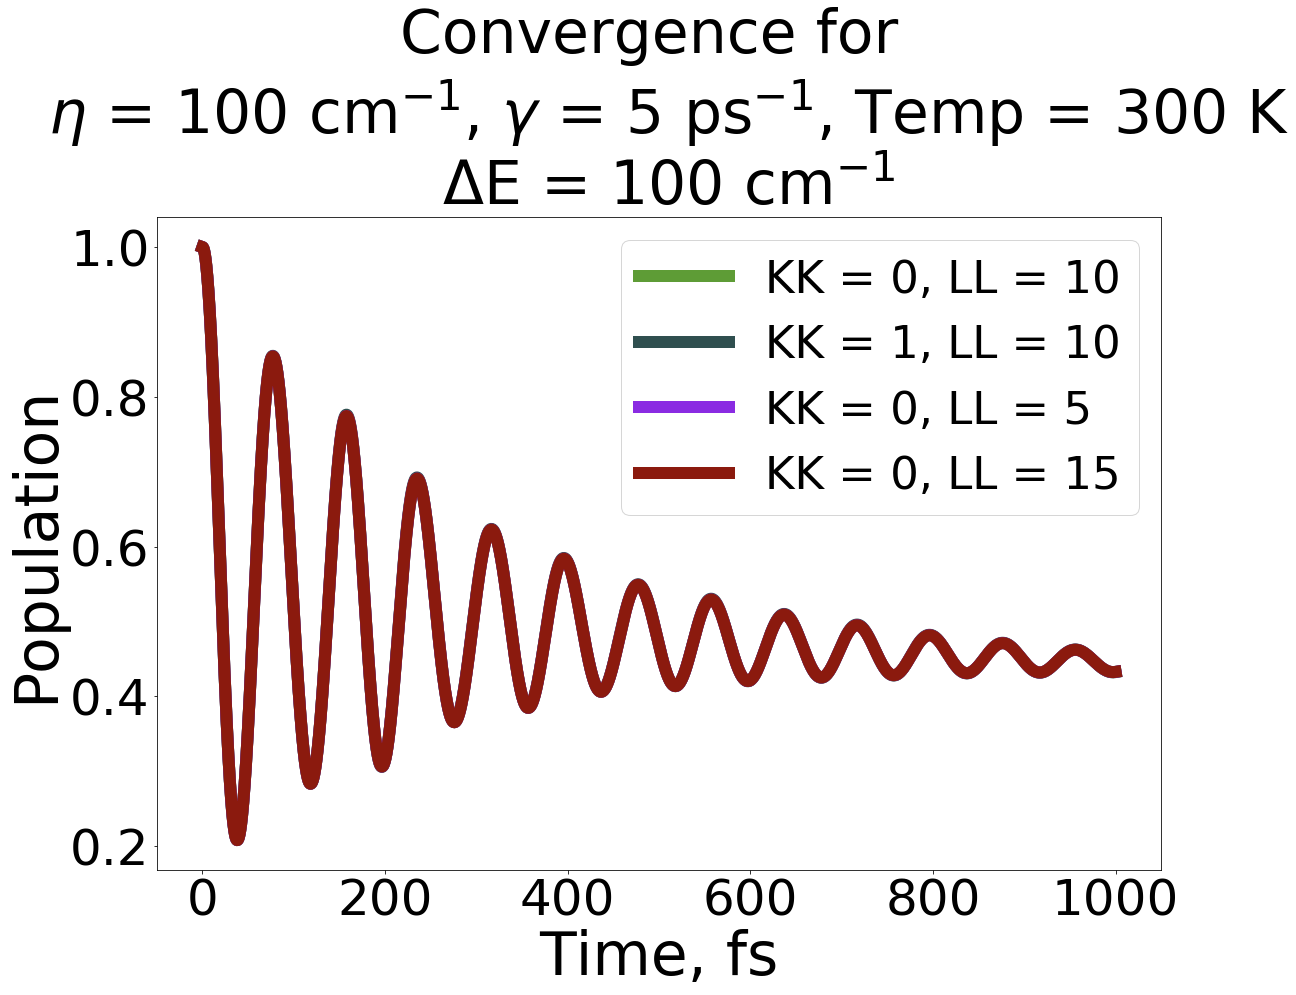

In [6]:
A = [ None, None ]

with h5py.File(F"convergence/out_gamma5_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_gamma5_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_gamma5_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_gamma5_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 5 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [7]:
params.update({"prefix":"convergence/out_gamma100_a_0", "KK":0, "LL":10, "gamma":100/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 7.498669385910034 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 42.140663862228394 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations t

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


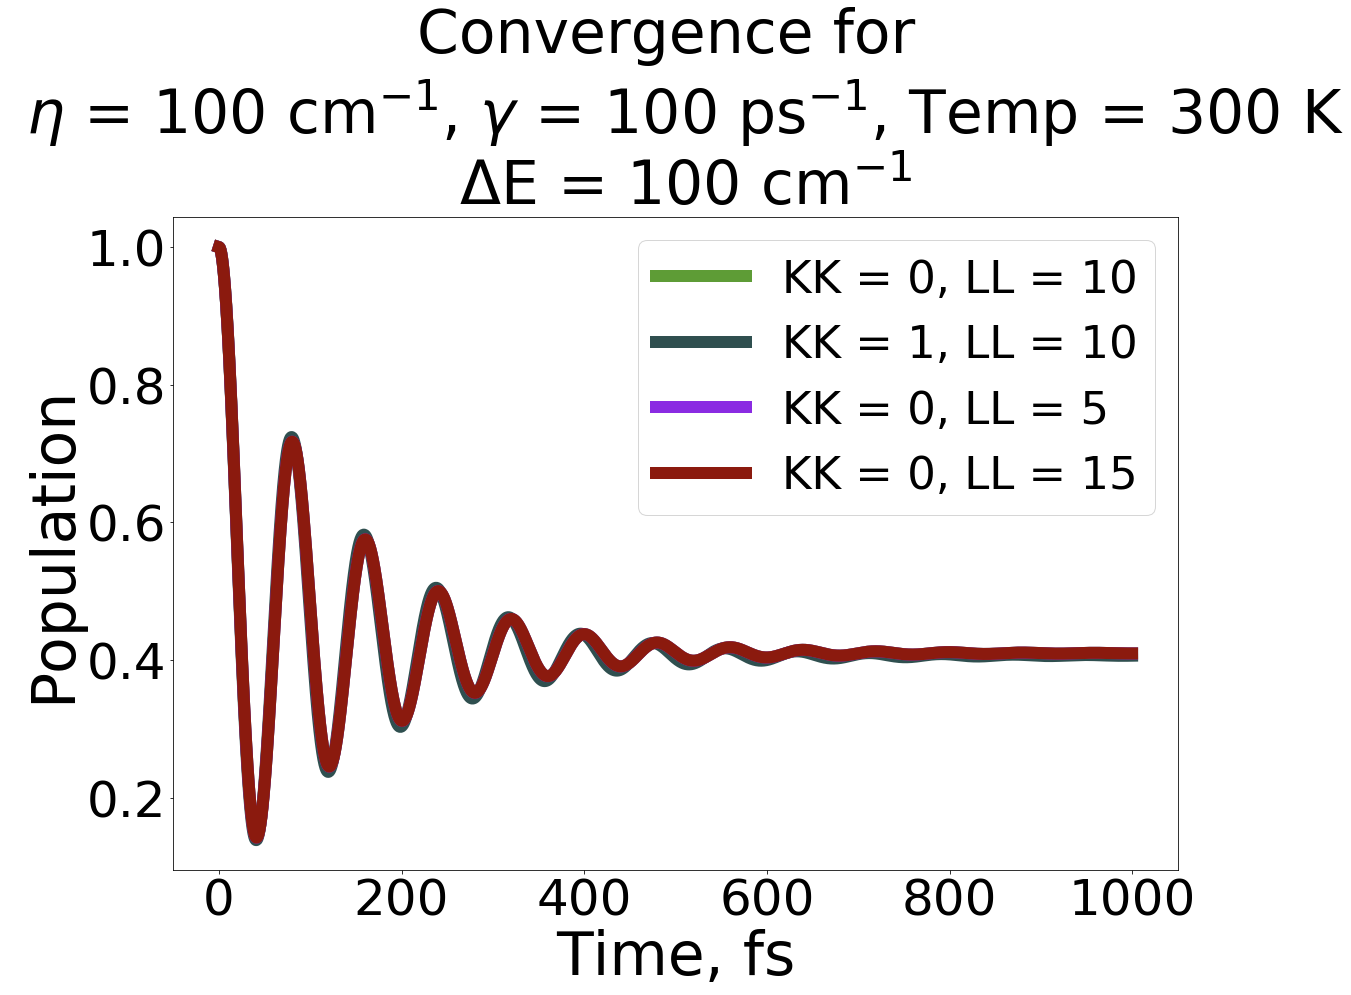

In [8]:
A = [ None, None ]

with h5py.File(F"convergence/out_gamma100_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_gamma100_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_gamma100_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_gamma100_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 100 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [9]:
params.update({"prefix":"convergence/out_eta50_a_0", "KK":0, "LL":10, "eta":50.0 * units.inv_cm2Ha, "gamma":10/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 7.672150611877441 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 41.29655408859253 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations to

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


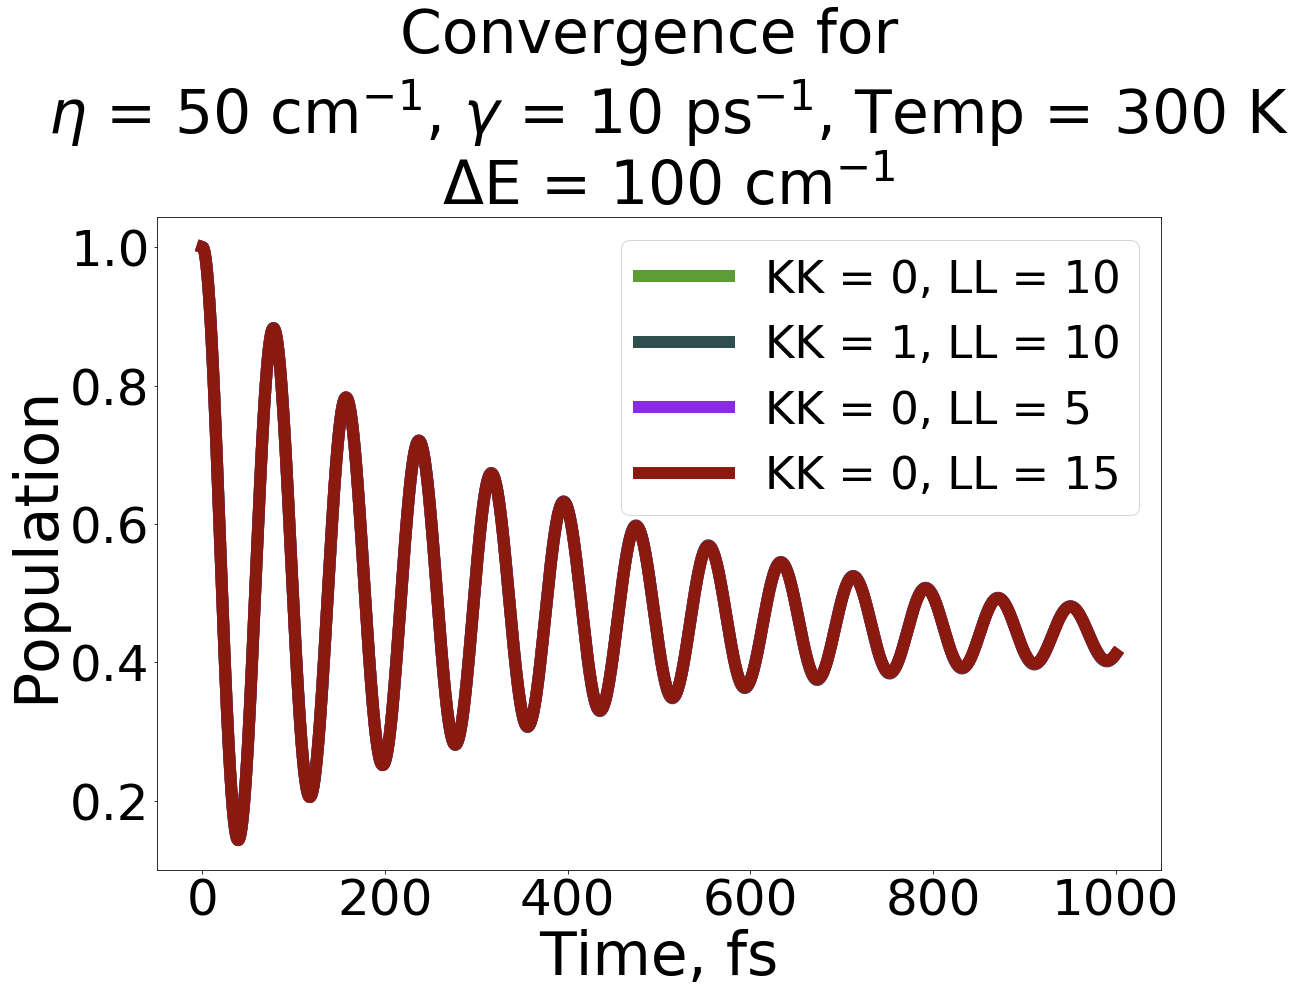

In [10]:
A = [ None, None ]

with h5py.File(F"convergence/out_eta50_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_eta50_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_eta50_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_eta50_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 50 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [11]:
params.update({"prefix":"convergence/out_eta250_a_0", "KK":0, "LL":10, "eta":250.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 7.936473846435547 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 44.35745716094971 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations to

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


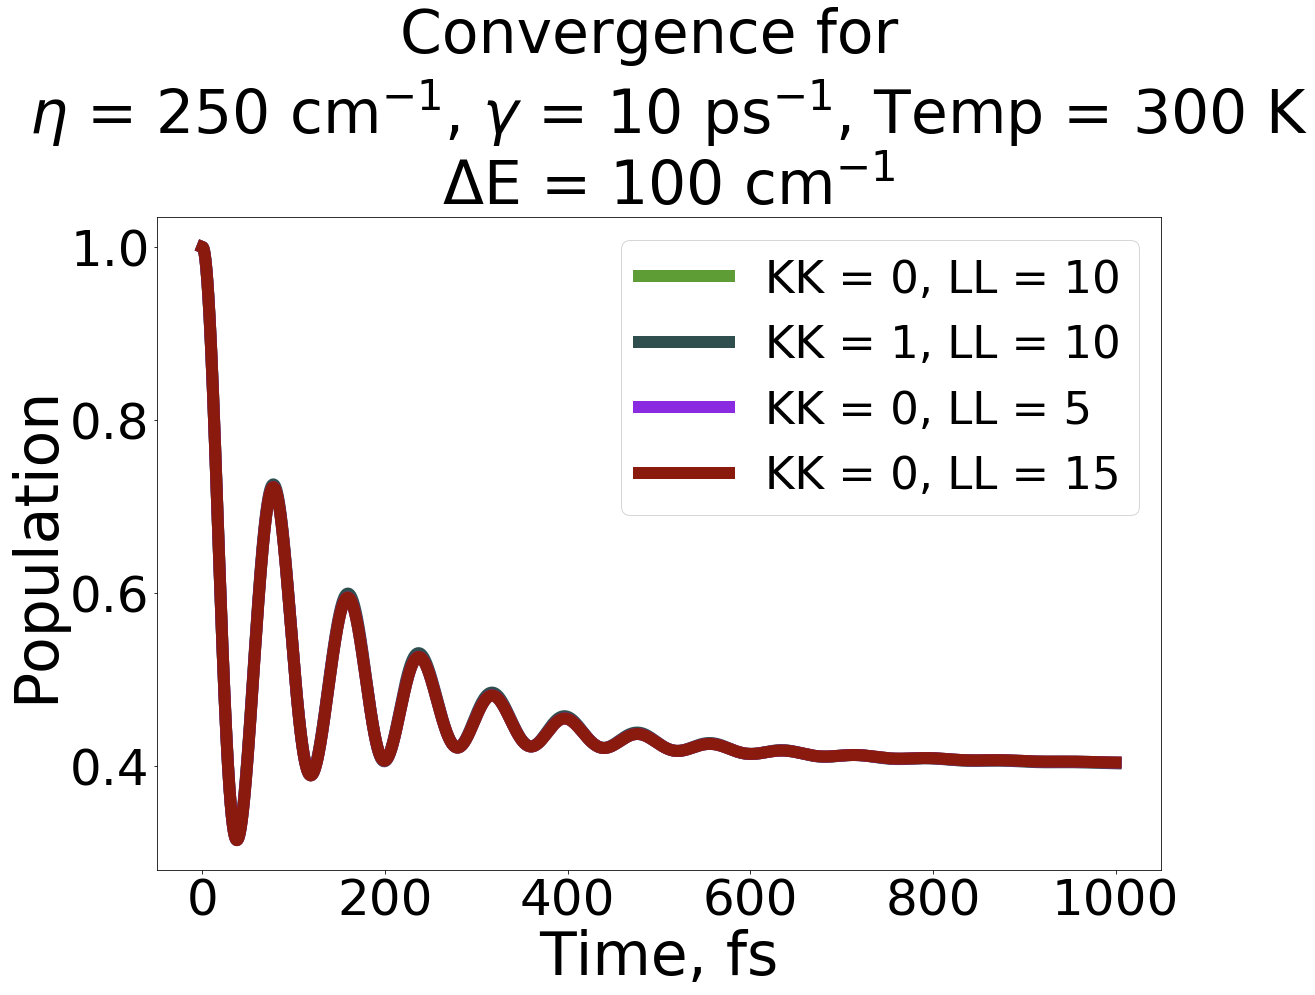

In [12]:
A = [ None, None ]

with h5py.File(F"convergence/out_eta250_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_eta250_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_eta250_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_eta250_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 250 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [13]:
params.update({"prefix":"convergence/out_temp150_a_0", "KK":0, "LL":10, "temperature":150, "eta":100.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 8.66769552230835 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 43.29214954376221 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations too

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


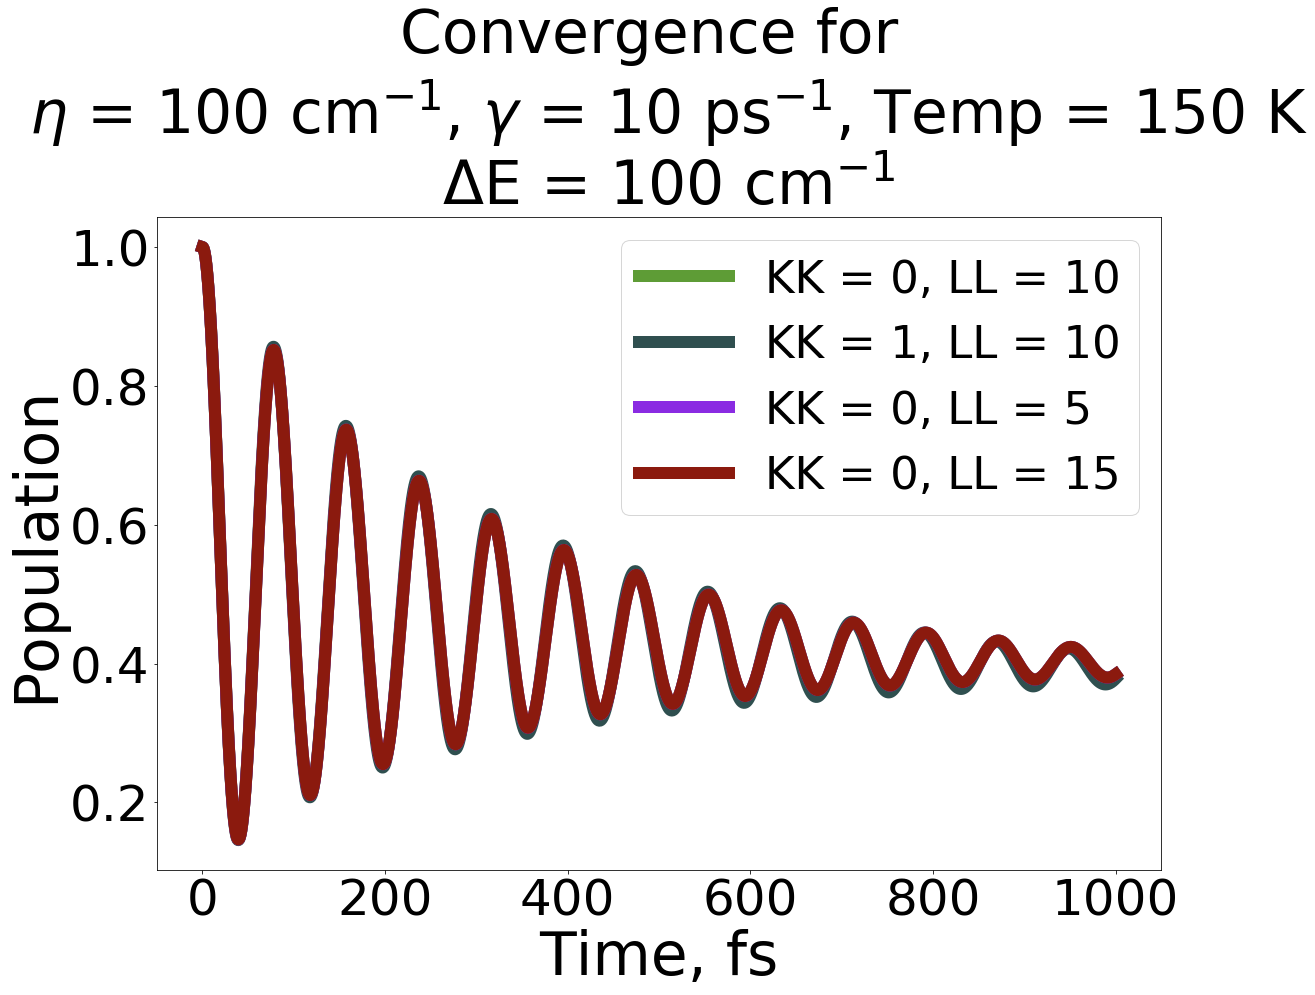

In [14]:
A = [ None, None ]

with h5py.File(F"convergence/out_temp150_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_temp150_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_temp150_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_temp150_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 150 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [15]:
params.update({"prefix":"convergence/out_temp500_a_0", "KK":0, "LL":10, "temperature":500})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_b_0", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_c_0", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_d_0", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 7.938715696334839 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 46.7974796295166 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations too

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


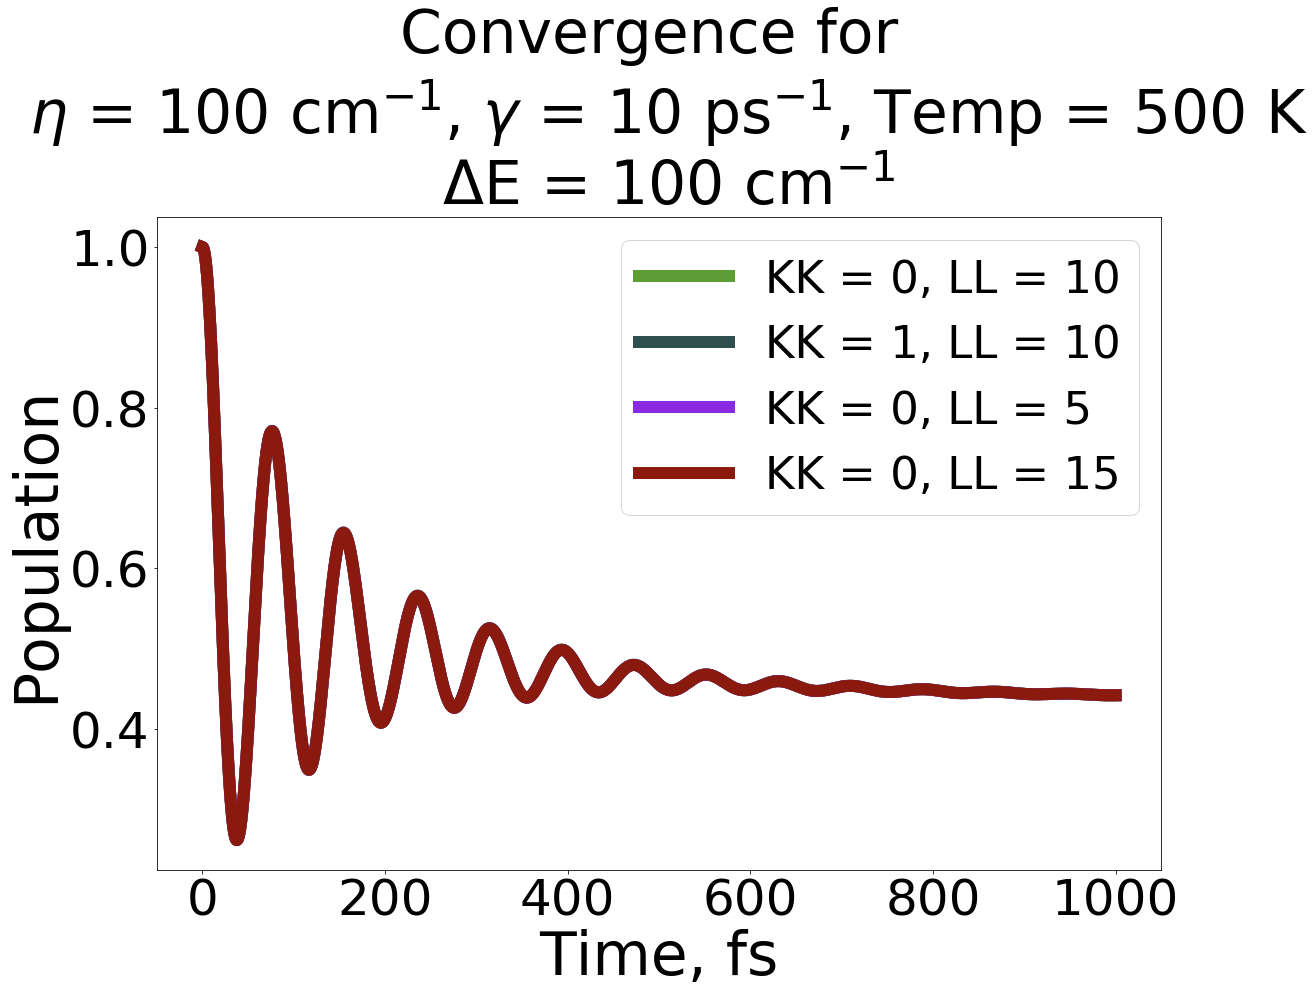

In [16]:
A = [ None, None ]

with h5py.File(F"convergence/out_temp500_a_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_temp500_b_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_temp500_c_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_temp500_d_0/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 500 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

<h3>Now checking convergence for $\Delta$E = 200 cm$^{-1}$</h3>
Same as above, just with a different Hamiltonian. 

In [17]:
Ham = CMATRIX(2,2)
Ham.set(0, 0, 100.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -100.0 * units.inv_cm2Ha);

rho = CMATRIX(2,2)
rho.set(0, 0, 1.0+0.0j)


params = { "KK":0, "LL":10,
           "gamma": 1/(0.1 * units.ps2au),
           "eta": 2.0 * 50.0 * units.inv_cm2Ha,
           "temperature": 300.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),

           "dt":0.1*units.fs2au, "nsteps":10000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":16,

           "prefix":"convergence/out_default_a_1",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

Run dynamics varying only convergence parameters (KK and LL). 

In [18]:
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_default_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.004494428634644 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 49.15186262130737 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations t

Plot results

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


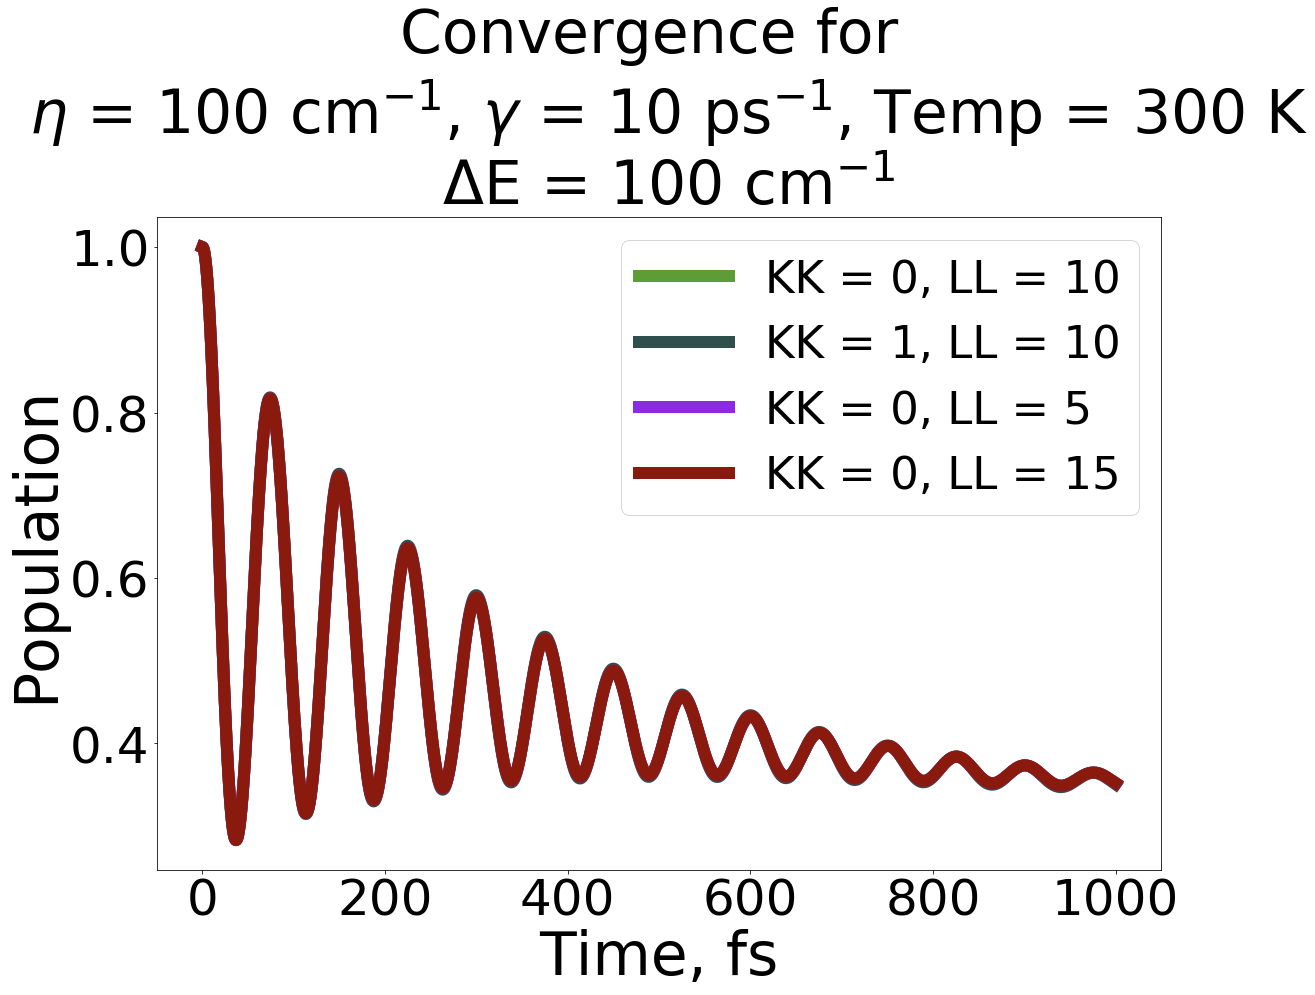

In [19]:
A = [ None, None ]

with h5py.File(F"convergence/out_default_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_default_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_default_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_default_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [20]:
params.update({"prefix":"convergence/out_gamma5_a_1", "KK":0, "LL":10, "gamma":5/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma5_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 11.796586990356445 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 49.889806032180786 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations 

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


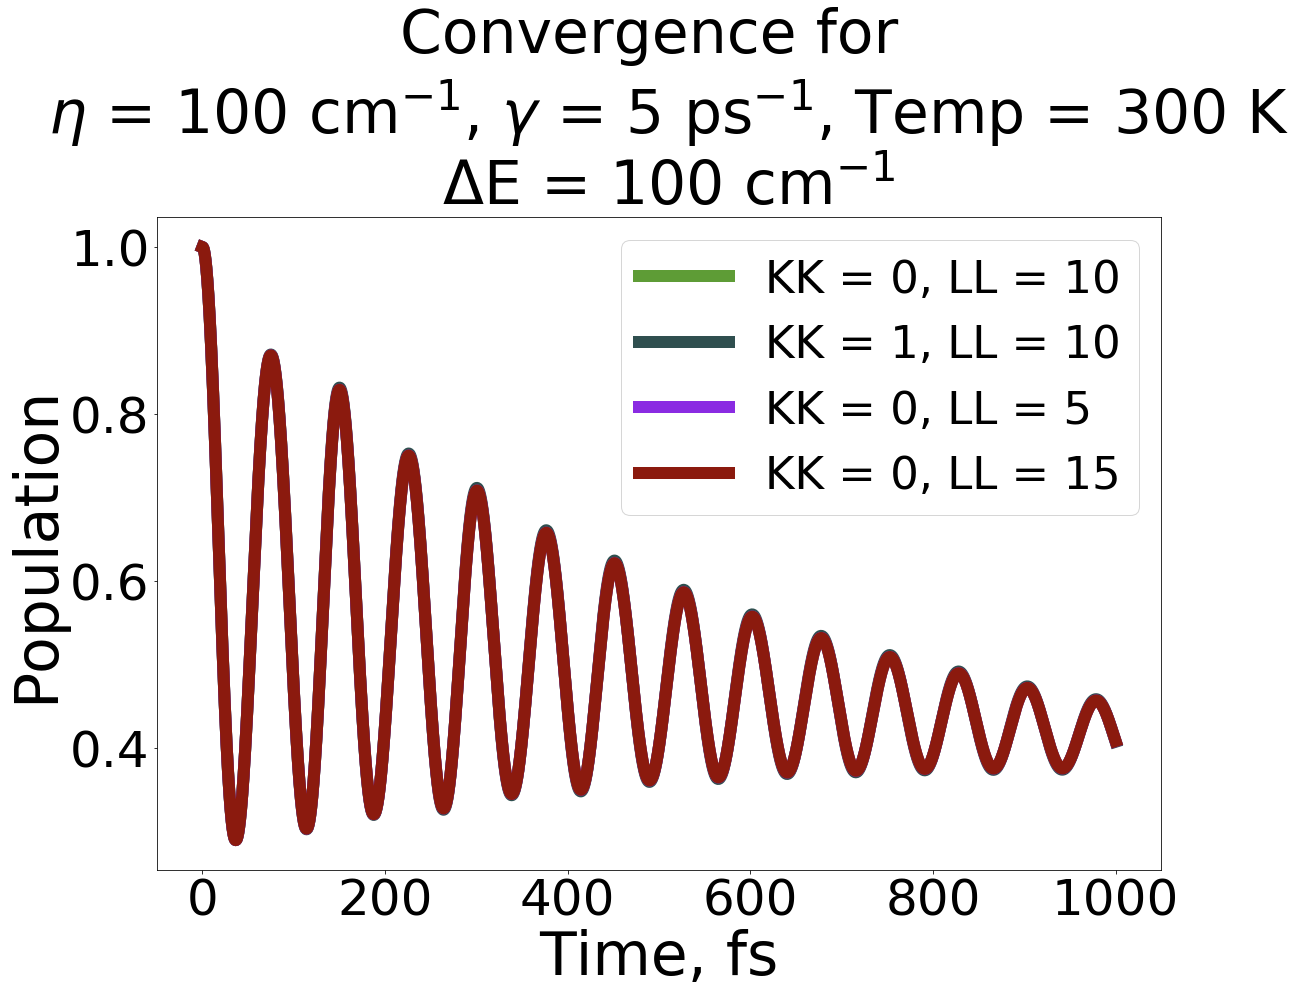

In [21]:
A = [ None, None ]

with h5py.File(F"convergence/out_gamma5_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_gamma5_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_gamma5_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_gamma5_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 5 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [22]:
params.update({"prefix":"convergence/out_gamma100_a_1", "KK":0, "LL":10, "gamma":100/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_gamma100_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 9.49498701095581 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 44.70385193824768 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations too

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


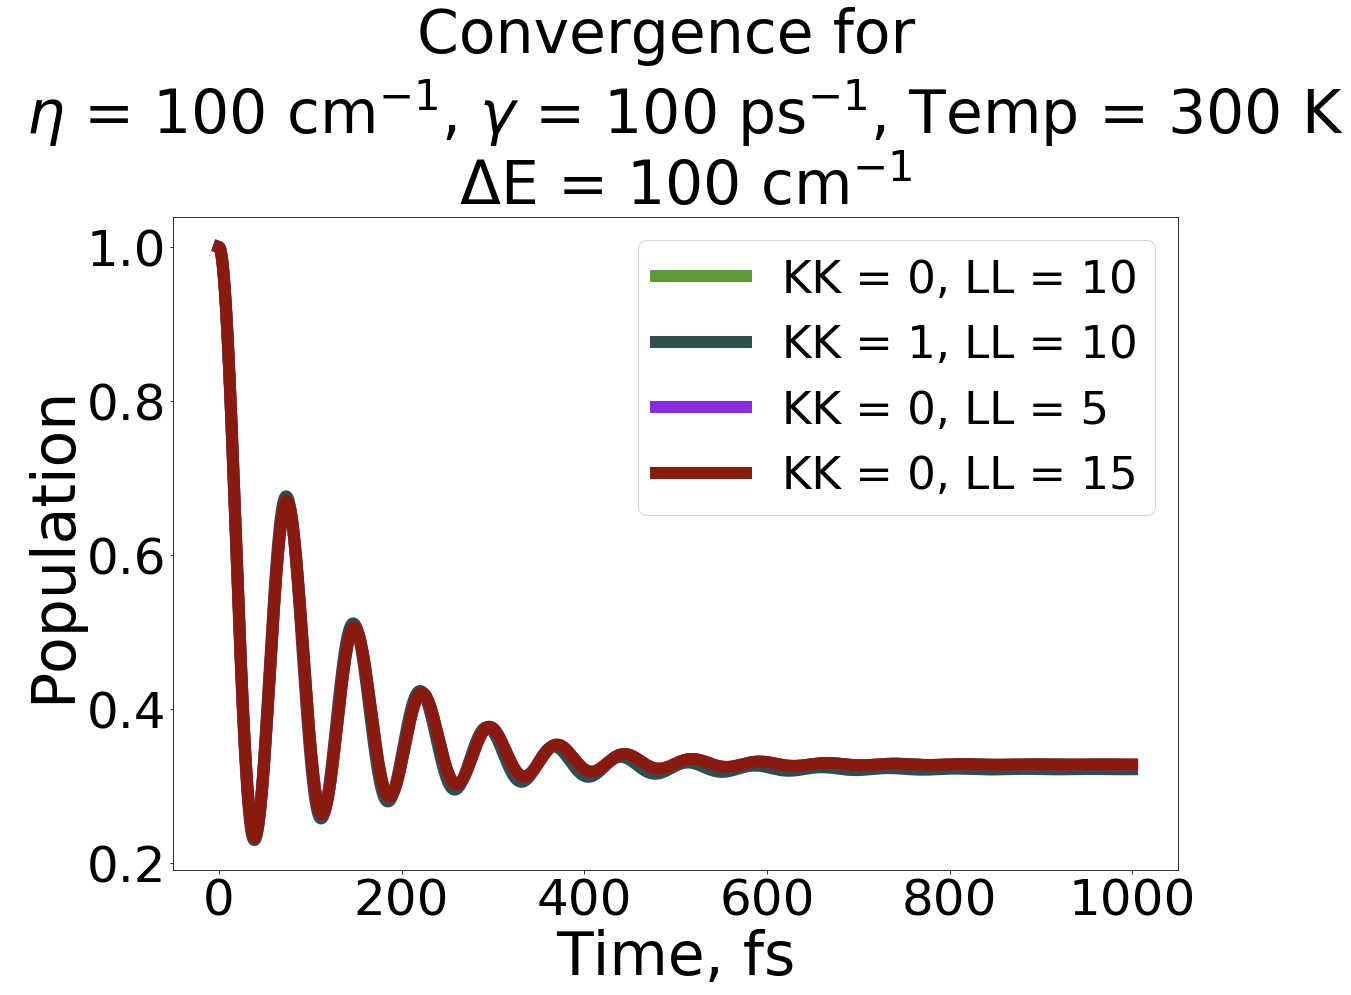

In [23]:
A = [ None, None ]

with h5py.File(F"convergence/out_gamma100_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_gamma100_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_gamma100_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_gamma100_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 100 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [24]:
params.update({"prefix":"convergence/out_eta50_a_1", "KK":0, "LL":10, "eta":50.0 * units.inv_cm2Ha, "gamma":10/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta50_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 8.65912413597107 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 44.99686574935913 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations too

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


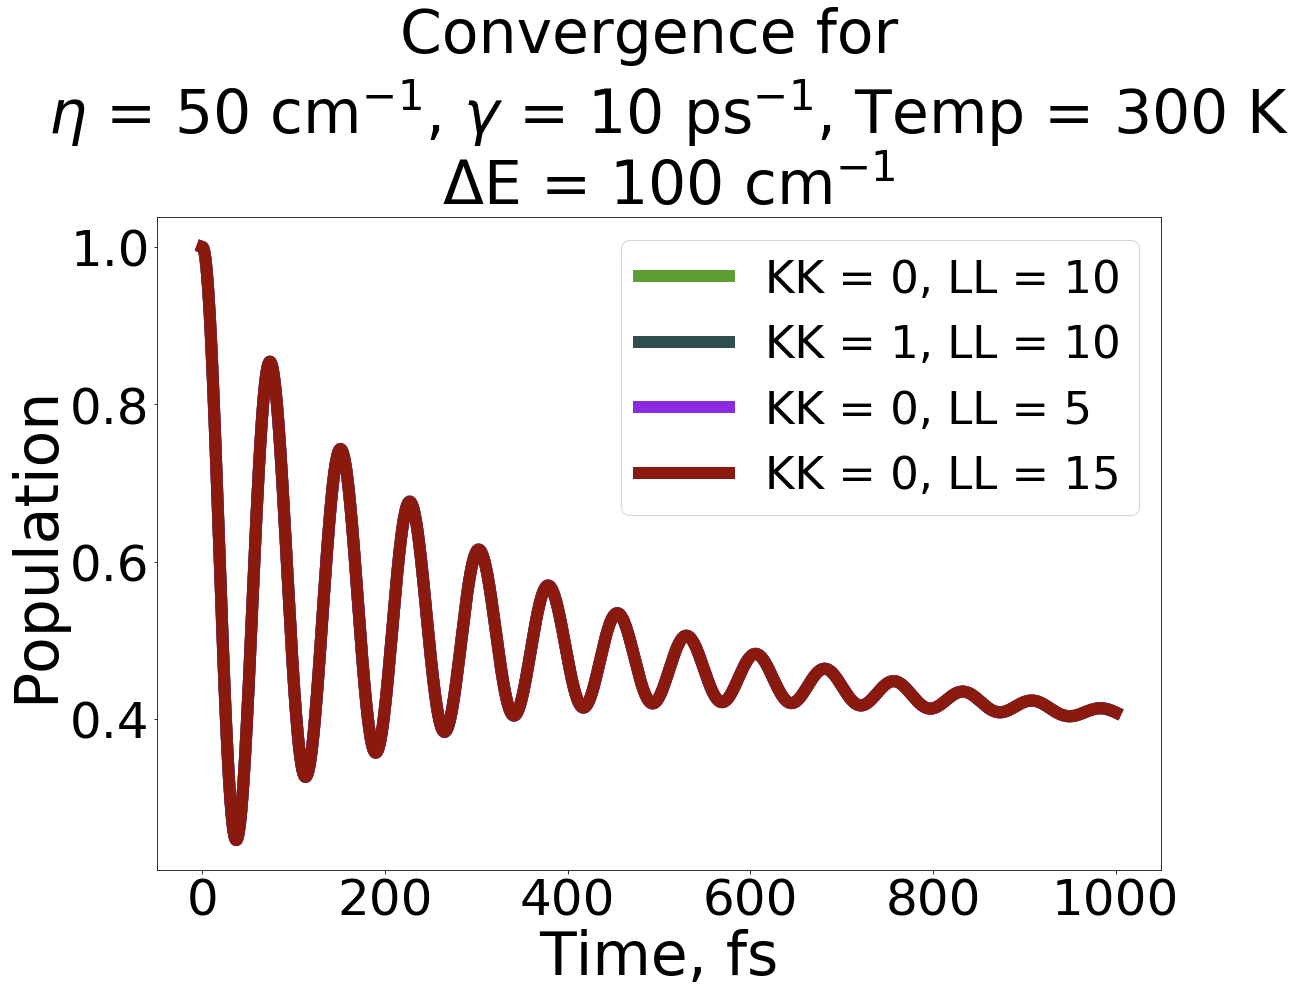

In [25]:
A = [ None, None ]

with h5py.File(F"convergence/out_eta50_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_eta50_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_eta50_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_eta50_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 50 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [26]:
params.update({"prefix":"convergence/out_eta250_a_1", "KK":0, "LL":10, "eta":250.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_eta250_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 8.808945655822754 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 47.73285531997681 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations to

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


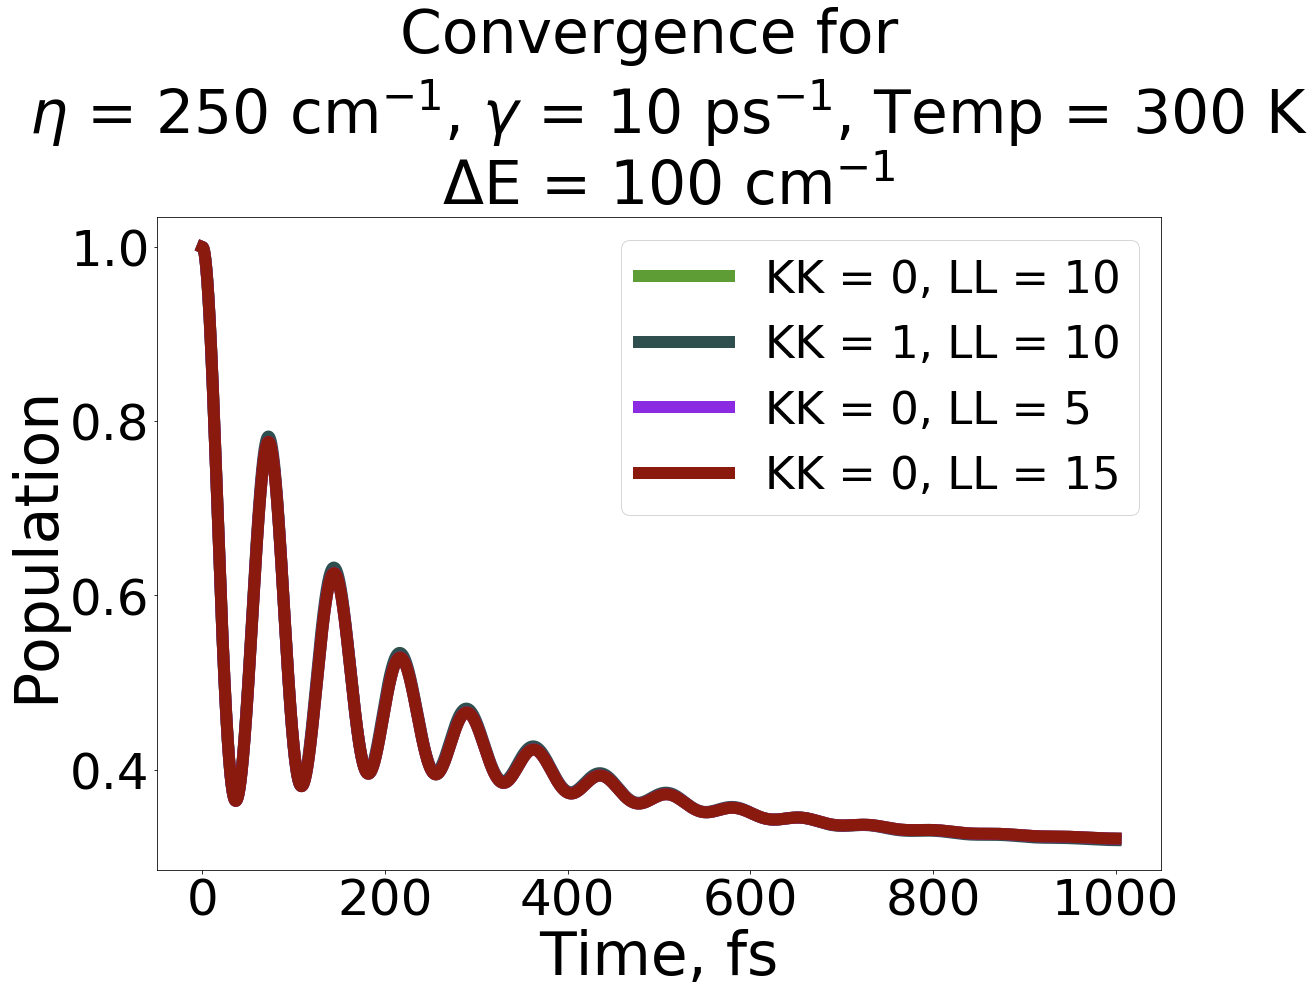

In [27]:
A = [ None, None ]

with h5py.File(F"convergence/out_eta250_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_eta250_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_eta250_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_eta250_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 250 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 300 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

In [28]:
params.update({"prefix":"convergence/out_temp150_a_1", "KK":0, "LL":10, "temperature":150, "eta":100.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp150_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 9.292182922363281 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 45.24398851394653 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations to

In [ ]:
A = [ None, None ]

with h5py.File(F"convergence/out_temp150_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_temp150_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_temp150_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_temp150_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 150 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [ ]:
params.update({"prefix":"convergence/out_temp500_a_1", "KK":0, "LL":10, "temperature":500})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_b_1", "KK":1})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_c_1", "KK":0, "LL":5})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_temp500_d_1", "LL":15})
compute.run_dynamics(params, Ham, rho)

In [ ]:
A = [ None, None ]

with h5py.File(F"convergence/out_temp500_a_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_temp500_b_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_temp500_c_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_temp500_d_1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

title = 'Convergence for \n $\eta$ = 100 cm$^{-1}$, $\gamma$ = 10 ps$^{-1}$, Temp = 500 K \n $\Delta$E = 100 cm$^{-1}$'
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title(title, fontsize=60)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"KK = 0, LL = 10", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"KK = 1, LL = 10", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"KK = 0, LL = 5", linewidth=12, color = colors["31"])
plt.plot(D[0], D[1], label=f"KK = 0, LL = 15", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()